## Preguntas
1. Cual es la provincia que mas monto retroactivo recive?
2. Cual es la provincia que mas destinatario tiene?
3. Cual es la provincia que mas monto recive? 
4. Alguna provincia no recive el monto?
5. Cual es la provincia que menos destinatarios tiene?

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as grafico
import matplotlib.pyplot as grafico1
import matplotlib.pyplot as grafico2

data = pd.read_csv("./datos.csv",skipinitialspace=True)

def convertir_en_minusculas(valor):
  if type(valor) == str:
    return valor.lower()
  else:
    return valor

def corregirProvincias(valor):
    valor = str(valor)
    if valor.__contains__("autónoma"):
      valor = "caba"
    elif valor.startswith("tierra"):
      valor = "tierra del fuego"
    return valor

def numConComa(valor):
    valor = "{0:.2f}".format(float(valor))
    return valor

def corregirNull(valor):
    if valor == "nan":
        valor = np.nan
    return valor

data = data.applymap(convertir_en_minusculas)
data["provincia"] = data["provincia"].apply(corregirProvincias)
data["monto"] = data["monto"].apply(numConComa)
data["monto_retroactivo"] = data["monto_retroactivo"].apply(numConComa)
data = data.applymap(corregirNull)
data = data.dropna()

data.to_csv('./DatosLimpios.csv')

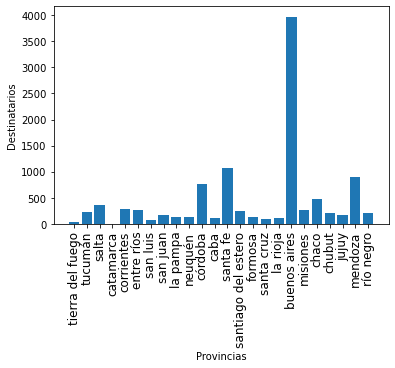

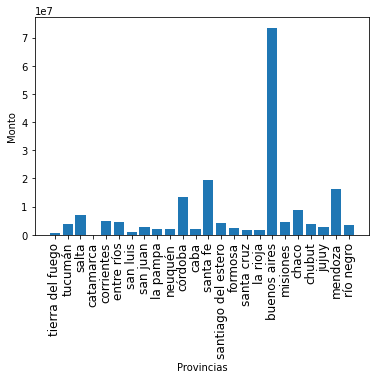

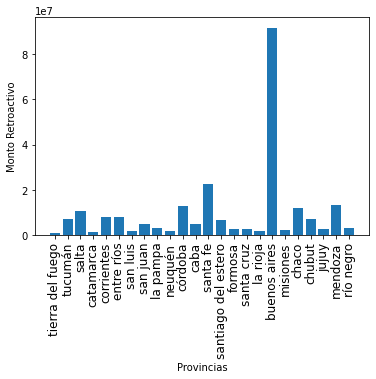

In [12]:
diccionario = {}
arrayProvincias = []

for i, valor in data["provincia"].items():
    arrayProvincias.append(valor)
    arrayProvincias = list(set(arrayProvincias))

for i in arrayProvincias:
    condicion = data.provincia == i
    n = data[condicion]["destinatarios"].astype(int).sum()
    diccionario[i] = n

grafico.bar( diccionario.keys(),diccionario.values())
grafico.xlabel('Provincias')
grafico.ylabel('Destinatarios')
grafico.xticks(rotation=90,fontsize=12)
grafico.show()

diccionario1 = {}

for x in arrayProvincias:
    condicion1 = data.provincia == x
    m = data[condicion1]["monto"].astype(float).sum()
    diccionario1[x] = m

grafico1.bar( diccionario1.keys(),diccionario1.values())
grafico1.xlabel('Provincias')
grafico1.ylabel('Monto')
grafico1.xticks(rotation=90,fontsize=12)
grafico1.show()

diccionario2 = {}

for z in arrayProvincias:
    condicion2 = data.provincia == z
    b = data[condicion2]["monto_retroactivo"].astype(float).sum()
    diccionario2[z] = b

grafico2.bar( diccionario2.keys(),diccionario2.values())
grafico2.xlabel('Provincias')
grafico2.ylabel('Monto Retroactivo')
grafico2.xticks(rotation=90,fontsize=12)
grafico2.show()

## Informe
Este dataset trata sobre la reparacion economica a hijos e hijas victimas de violencia de genero. Como se puede ver gracias a los graficos en buenos aires es donde mas violencia de genero hay ya que hay muchimos mas destinatarios que en las otras provincias por consecuente, obviamente, va haber mas monto en esta provincia. Si bien parece que en algunas no hay nigun destinatario, si hay, en todas las provincias hay violencia de genero, y todas las provincias reciben estos montos. La provinvia que menos recibe por lo tanto menos violencia de genero tiene es Catamarca.